In [3]:
import pandas as pd
import numpy as np  
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
# Importing the data / Leitura dos dados

url_log_exp_us = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Foods_Products_Startup/refs/heads/main/logs_exp_us.csv'

log_exp_us = pd.read_csv(url_log_exp_us, sep = "\t")

In [5]:
log_exp_us.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [6]:
log_exp_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [7]:
log_exp_us.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


In [8]:
log_exp_us.columns = ['event_name', 'device_id', 'event_timestamp', 'exp_id']

In [9]:
log_exp_us.isnull().sum()

event_name         0
device_id          0
event_timestamp    0
exp_id             0
dtype: int64

In [10]:
log_exp_us['event_datetime'] = pd.to_datetime(log_exp_us['event_timestamp'], unit='s')
log_exp_us['event_date'] = log_exp_us['event_datetime'].dt.date

In [11]:
log_exp_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id        244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  int64         
 4   event_datetime   244126 non-null  datetime64[ns]
 5   event_date       244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [12]:
total_eventos = log_exp_us.shape[0]
print(f"Total de eventos: {total_eventos}")

Total de eventos: 244126


In [13]:
usuarios_unicos = log_exp_us['device_id'].nunique()
print(f"Total de usuários únicos: {usuarios_unicos}")

Total de usuários únicos: 7551


In [14]:
media_eventos_por_usuario = total_eventos / usuarios_unicos
print(f"Número médio de eventos por usuário: {media_eventos_por_usuario:.2f}")

Número médio de eventos por usuário: 32.33


In [15]:
data_minima = log_exp_us['event_datetime'].min()
data_maxima = log_exp_us['event_datetime'].max()
print(f"Período dos dados: {data_minima} a {data_maxima}")

Período dos dados: 2019-07-25 04:43:36 a 2019-08-07 21:15:17


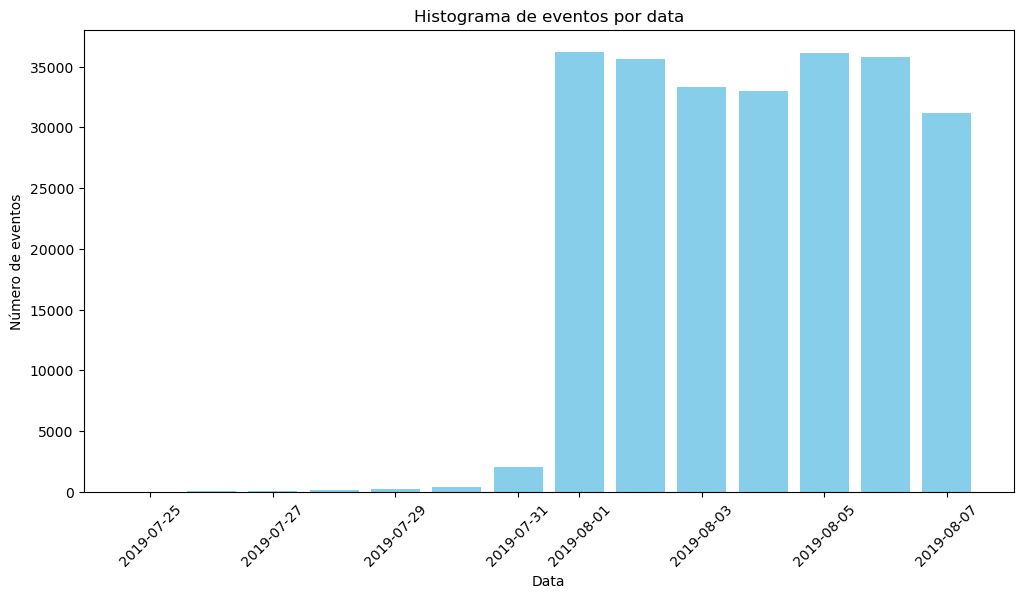

In [16]:
eventos_por_data = log_exp_us.groupby('event_date').size()

plt.figure(figsize=(12, 6))
plt.bar(eventos_por_data.index, eventos_por_data.values, color='skyblue')
plt.title('Histograma de eventos por data')
plt.xlabel('Data')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.show()

In [17]:
import datetime

data_inicial_completa = '2019-07-31'
data_inicial_completa = datetime.date.fromisoformat(data_inicial_completa)
log_exp_us = log_exp_us[log_exp_us['event_date'] >= data_inicial_completa]

In [18]:
usuarios_por_grupo = log_exp_us.groupby('exp_id')['device_id'].nunique()
print(usuarios_por_grupo)

exp_id
246    2485
247    2517
248    2540
Name: device_id, dtype: int64


In [19]:
frequencia_eventos = log_exp_us['event_name'].value_counts()
print(frequencia_eventos)

event_name
MainScreenAppear           118681
OffersScreenAppear          46724
CartScreenAppear            42623
PaymentScreenSuccessful     34253
Tutorial                     1048
Name: count, dtype: int64


In [20]:
usuarios_por_evento = log_exp_us.groupby('event_name')['device_id'].nunique()
proporcao_por_evento = usuarios_por_evento / usuarios_unicos
print(proporcao_por_evento)

event_name
CartScreenAppear           0.495564
MainScreenAppear           0.983843
OffersScreenAppear         0.609985
PaymentScreenSuccessful    0.469077
Tutorial                   0.111906
Name: device_id, dtype: float64


In [21]:
sequencia_funil = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Número de usuários em cada etapa
usuarios_funil = {}
for i, evento in enumerate(sequencia_funil):
    if i == 0:
        usuarios_funil[evento] = set(log_exp_us[log_exp_us['event_name'] == evento]['device_id'])
    else:
        usuarios_funil[evento] = usuarios_funil[sequencia_funil[i-1]].intersection(
            log_exp_us[log_exp_us['event_name'] == evento]['device_id']
        )

for i in range(len(sequencia_funil) - 1):
    atual = sequencia_funil[i]
    proxima = sequencia_funil[i + 1]
    proporcao = len(usuarios_funil[proxima]) / len(usuarios_funil[atual])
    print(f"Proporção de {atual} → {proxima}: {proporcao:.2%}")

Proporção de MainScreenAppear → OffersScreenAppear: 60.53%
Proporção de OffersScreenAppear → CartScreenAppear: 79.74%
Proporção de CartScreenAppear → PaymentScreenSuccessful: 95.76%


In [22]:
usuarios_por_grupo = log_exp_us.groupby('exp_id')['device_id'].nunique()
print(usuarios_por_grupo)

exp_id
246    2485
247    2517
248    2540
Name: device_id, dtype: int64


In [23]:
from scipy.stats import f_oneway

# Contar o número de eventos por device_id em cada grupo
freq_eventos = log_exp_us.groupby(['exp_id', 'device_id']).size().reset_index(name='event_count')

# Grupos para ANOVA
grupo_246 = freq_eventos[freq_eventos['exp_id'] == 246]['event_count']
grupo_247 = freq_eventos[freq_eventos['exp_id'] == 247]['event_count']
grupo_248 = freq_eventos[freq_eventos['exp_id'] == 248]['event_count']

f_stat, p_val = f_oneway(grupo_246, grupo_247, grupo_248)
print(f"F-valor: {f_stat}, p-valor: {p_val}")

F-valor: 1.1097193234774474, p-valor: 0.32970531510276097


Teste ANOVA escolhido, devido ser possível comparação com os três grupos que temos e identificar se pelo menos um deles tem uma média significativamente diferente.

- Conclusão teste efetuado:

    - O F-valor é a medida da variância entre os grupos comparada à variância dentro dos grupos.
    - O p-valor representa a probabilidade de observar um F-valor tão extremo quanto o calculado, assumindo que a hipótese nula é verdadeira.
        - Hipótese nula: Não há diferença significativa na métrica analisada (event_count) entre os grupos (246, 247, 248).
        - Hipótese alternativa: Há pelo menos uma diferença significativa entre os grupos.

    Não há evidências estatisticamente significativas para afirmar que os grupos são diferentes em relação à frequência de eventos por dispositivo.
    Em termos práticos, os grupos se comportam de forma semelhante em relação à métrica analisada.

## Conclusão por Tópicos

### Análise Geral

    - Total de eventos: 244.126.
    - Total de usuários únicos: 7.551.
    - Número médio de eventos por usuário: 32,33.
    - Período de análise: 25 de julho de 2019 a 7 de agosto de 2019.
    - Distribuição por grupos:
        - Grupo 246: 2.485 usuários.
        - Grupo 247: 2.517 usuários.
        - Grupo 248: 2.540 usuários.

### Análise de eventos

    - Principais eventos registrados:
        - MainScreenAppear: 118.681 ocorrências (98,38% dos dispositivos).
        - OffersScreenAppear: 46.724 ocorrências (60,99% dos dispositivos).
        - CartScreenAppear: 42.623 ocorrências (49,56% dos dispositivos).
        - PaymentScreenSuccessful: 34.253 ocorrências (46,91% dos dispositivos).
        - Tutorial: 1.048 ocorrências (11,19% dos dispositivos).

    - Taxas de conversão entre eventos:
        - MainScreenAppear → OffersScreenAppear: 60,53%.
        - OffersScreenAppear → CartScreenAppear: 79,74%.
        - CartScreenAppear → PaymentScreenSuccessful: 95,76%.

    - Teste ANOVA
        - F-valor: 1,11.
        - p-valor: 0,33.
        - Resultado: Não há diferenças estatisticamente significativas entre os grupos (246, 247 e 248) em relação à frequência de eventos por dispositivo.

## Conclusão Final

A análise realizada apresenta um panorama completo dos dados de eventos registrados entre os grupos de controle e teste. Com base no período de análise e nas métricas avaliadas, constatamos que a taxa de retenção do evento principal (MainScreenAppear) é alta (98,38%), indicando que quase todos os dispositivos acessaram essa tela.

Referente às taxas de conversão entre os eventos subsequentes (OffersScreenAppear a PaymentScreenSuccessful) também são expressivas, com uma conversão de 95,76% para pagamentos bem-sucedidos.

No teste ANOVA, não foi detectada diferenças estatisticamente significativas na frequência de eventos por dispositivo entre os grupos. Assim, os grupos se comportam de maneira semelhante em relação à métrica analisada.

Com base nesses pontos acima, pode-se concluir que a divisão entre os grupos de controle e teste não impactou significativamente o comportamento dos usuários em termos de frequência de eventos. Isso sugere que as mudanças testadas não geraram diferenças detectáveis neste conjunto de dados.